In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection  import  train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn import datasets
from sklearn.datasets import fetch_openml


In [2]:
# Load dataset
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target


In [3]:

#Split training and testing data
x_train , x_test, Y_train, Y_test = train_test_split(mnist.data,mnist.target,test_size = 0.1)
y_train = np.array([int(Y_train[i]) for i in range(len(Y_train))])
y_test = np.array([int(Y_test[i]) for i in range(len(Y_test))])


In [4]:
# Implementing QDA
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy:  0.5348571428571428


Text(0.5, 33.0, 'Predicted')

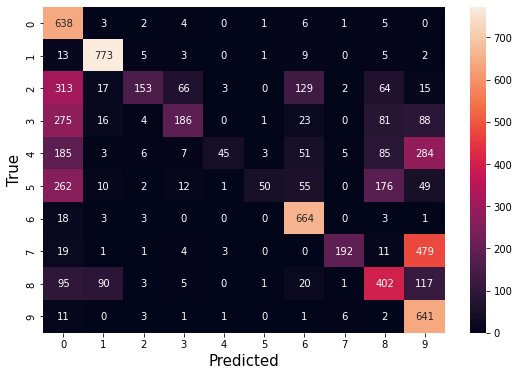

In [5]:

#Plot confusion matrix
plt.figure(figsize=[9,6])
sns.heatmap(confusion_matrix( y_test,y_pred),annot=True, fmt='.4g')
plt.ylabel('True',fontsize=15)
plt.xlabel('Predicted',fontsize=15)